In [27]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#Read the data
toyota=pd.read_csv("C:\\Users\\abhil\\OneDrive\\Desktop\\New folder\\ToyotaCorolla - MLR.csv")
toyota.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


## Performing EDA

In [4]:
toyota1=pd.get_dummies(data=toyota,dtype=int,drop_first=True)
toyota1.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0


In [5]:
toyota1=toyota1.rename({'Age_08_04':'Age'},axis=1)

In [6]:
# Correlatiom matrix
toyota1.corr()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


In [7]:
toyota1.drop(['Automatic','cc','Doors','Cylinders','Gears','Fuel_Type_Diesel','Fuel_Type_Petrol'],axis=1,inplace=True)
toyota1.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [8]:
toyota1.shape

(1436, 5)

### Correlation Matrix

In [9]:
toyota1.corr()

,Price,Age,KM,HP,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.089614
Weight,0.581198,-0.470253,-0.028598,0.089614,1.000000


## Data visualization

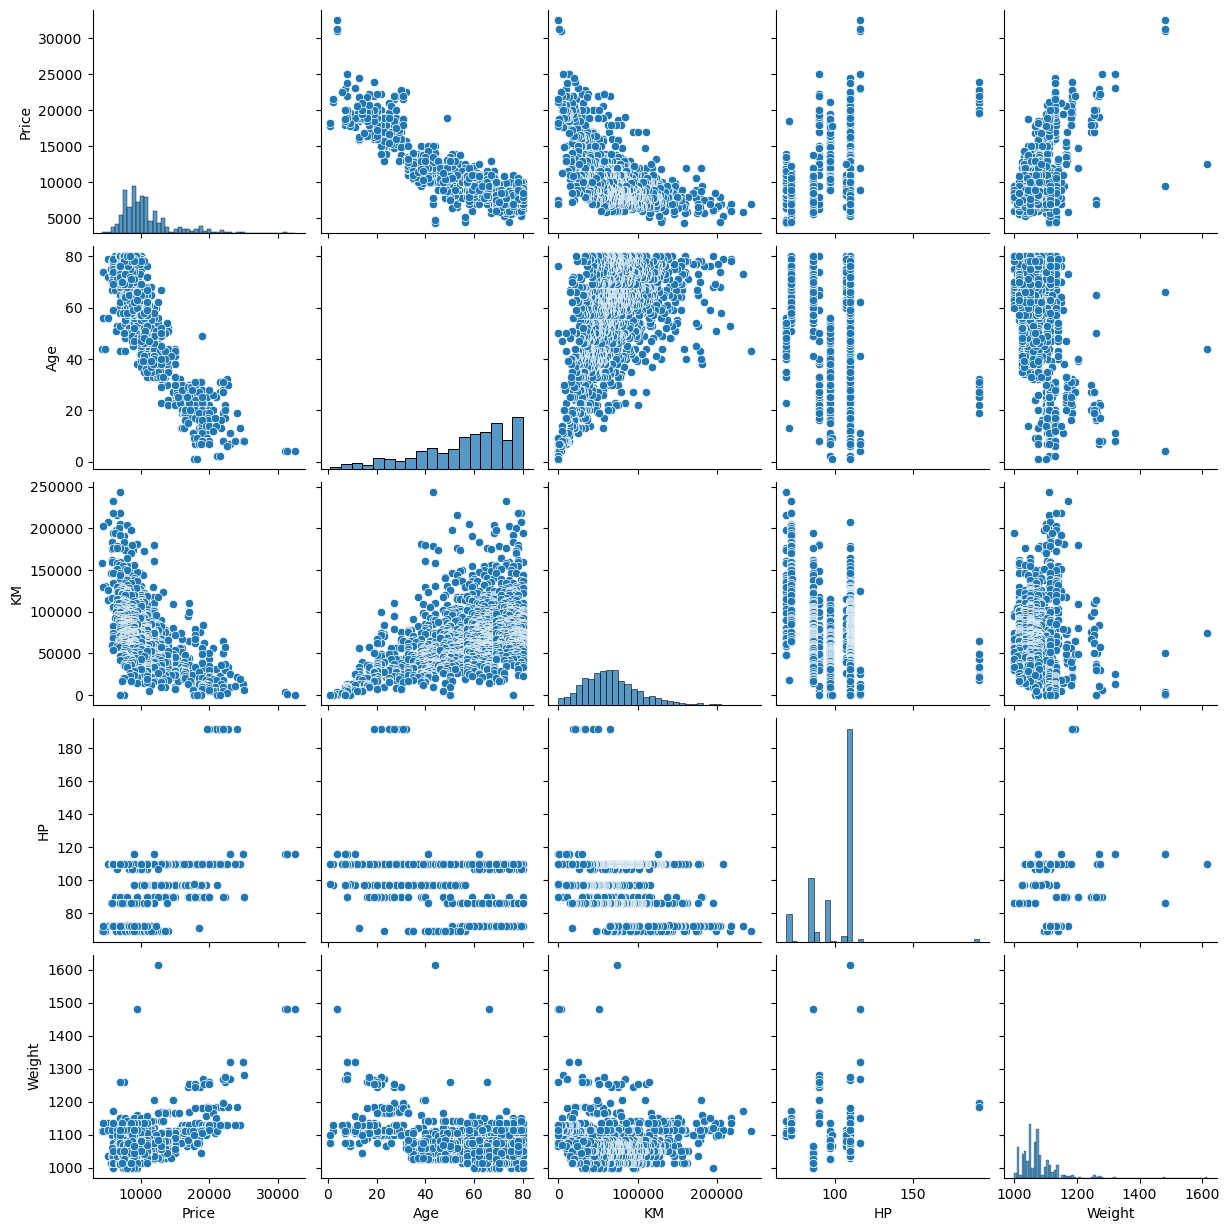

In [10]:
#scatter plots for all the variables
sns.pairplot(toyota1)

In [11]:
# Summary statistics
toyota1.describe()

,Price,Age,KM,HP,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1615.00000


# Split the dataset

In [12]:
from sklearn.model_selection import train_test_split

In [42]:
train,test=train_test_split(toyota1,test_size=0.2,random_state=3)
print(train.shape,test.shape)

(1148, 5) (288, 5)


# Build a model

In [43]:
#Build model
model=smf.ols("Price~Age+KM+HP+Weight",data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1840.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:17:16   Log-Likelihood:                -9911.6
No. Observations:                1148   AIC:                         1.983e+04
Df Residuals:                    1143   BIC:                         1.986e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6694.4397   1100.503     -6.083      0.000   -8853.672   -4535.208
Age         -120.6284      2.999    -40.226      0.000    -126.512    -114.745
KM            -0.0201      0.001    -14.633      0.000      -0.023      -0.017
HP            30.1245      2.760     10.913      0.000      24.708      35.541
Weight        21.0048      0.948     22.158      0.000      19.145      22.865
==============================================================================
Omnibus:                      131.870   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.226
Skew:                          -0.326   Prob(JB):                    4.65e-174
Kurtosis:                       7.033   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual Analysis

In [44]:
model.resid.mean()

-3.033906369646914e-09

<Axes: ylabel='Density'>

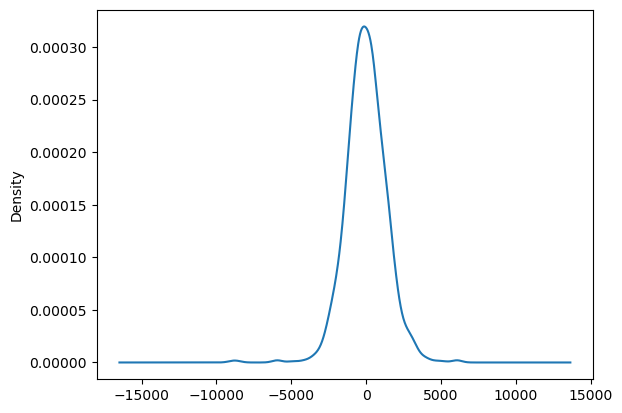

In [45]:
model.resid.plot(kind='kde')

#### Test for Normality of Residuals (Q-Q Plot)

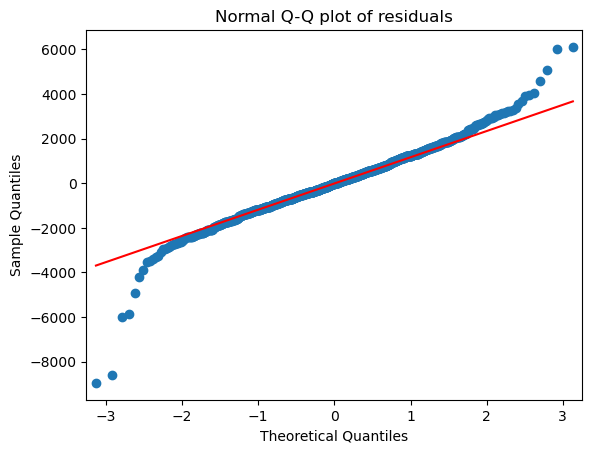

In [46]:
import statsmodels.api as smf
qqplot=smf.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

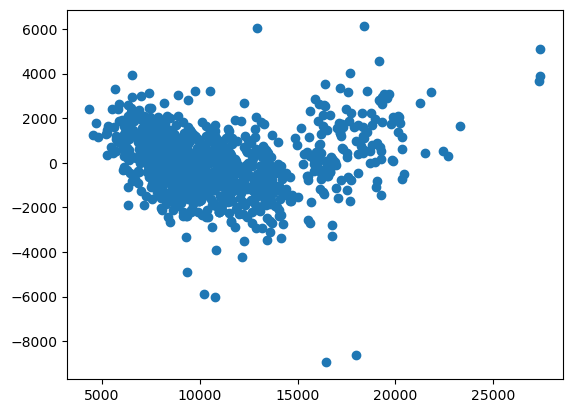

In [47]:
plt.scatter(model.fittedvalues,model.resid)

### Model Deletion Diagnostics

#### Detecting Outliers

#### Cook's Distance

In [48]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

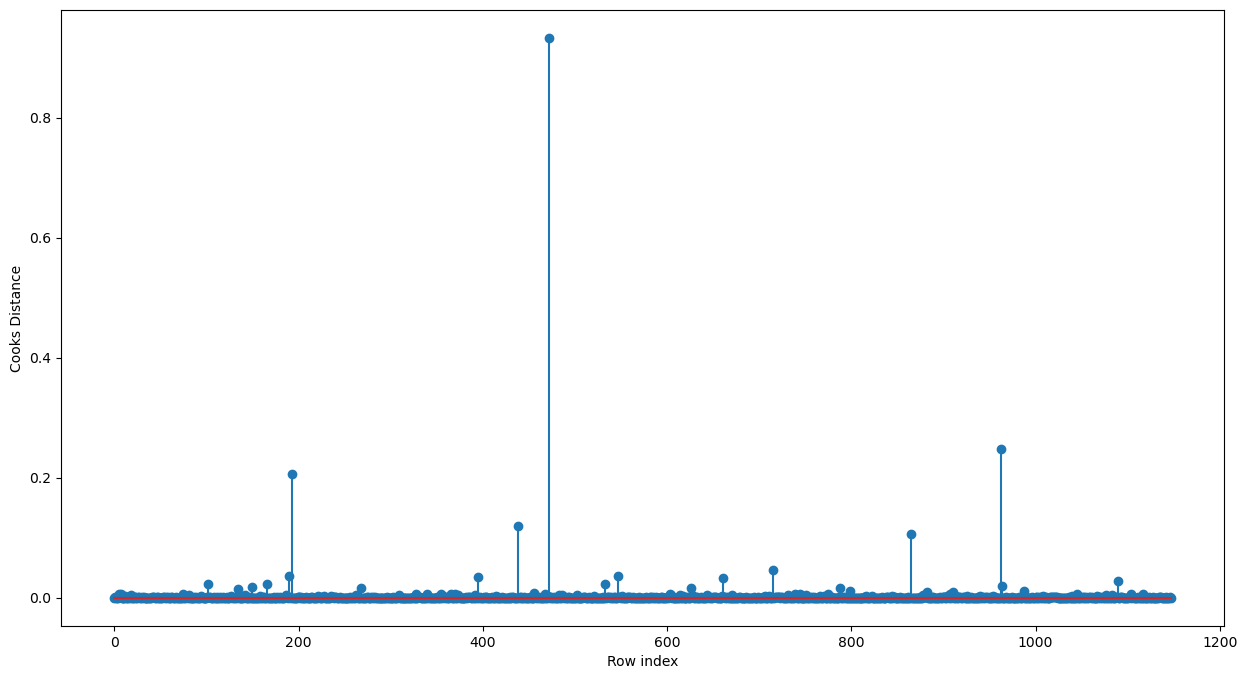

In [51]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15,8))
plt.stem(np.arange(len(train)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(472, 0.932746737188917)

In [53]:
k = train.shape[1]
n = train.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.015679442508710804

#### High Influence points

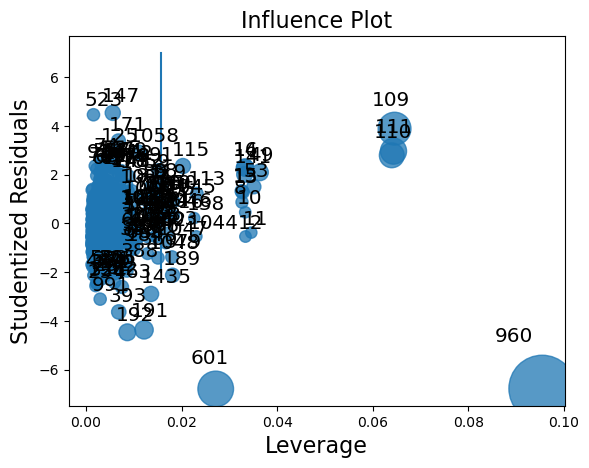

In [54]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(model)
y=[i for i in range (-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y)
plt.show()

From the above plot, it is evident that data point 960,109,111,110 and 601 are the influencers

# Improving the model

In [55]:
#Discard the data points which are influencers and reasign the row number (reset_index())
train1=train.drop(train.index[[960,109,111,110,601]],axis=0).reset_index(drop=True)

In [56]:
train1

,Price,Age,KM,HP,Weight
0,9750,65,59000,110,1075
1,13750,54,48370,110,1080
2,6650,75,123104,110,1070
3,7500,74,58454,86,1015
4,9950,63,55942,110,1070
...,...,...,...,...,...
1138,8950,62,75000,110,1070
1139,13500,38,53000,110,1075
1140,9950,63,48738,110,1055
1141,8400,60,52487,110,1035


# Build Model

In [59]:
import statsmodels.formula.api as smf

model2= smf.ols('Price~Age+KM+HP+Weight',data = train1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1835.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:20:15   Log-Likelihood:                -9869.4
No. Observations:                1143   AIC:                         1.975e+04
Df Residuals:                    1138   BIC:                         1.977e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6700.7273   1102.840     -6.076      0.000   -8864.554   -4536.900
Age         -120.7534      3.004    -40.201      0.000    -126.647    -114.860
KM            -0.0200      0.001    -14.554      0.000      -0.023      -0.017
HP            30.2174      2.768     10.918      0.000      24.787      35.648
Weight        21.0055      0.949     22.125      0.000      19.143      22.868
==============================================================================
Omnibus:                      131.625   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              793.187
Skew:                          -0.329   Prob(JB):                    5.78e-173
Kurtosis:                       7.028   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model2.resid.mean()

-1.5687661656738306e-09

<Axes: ylabel='Density'>

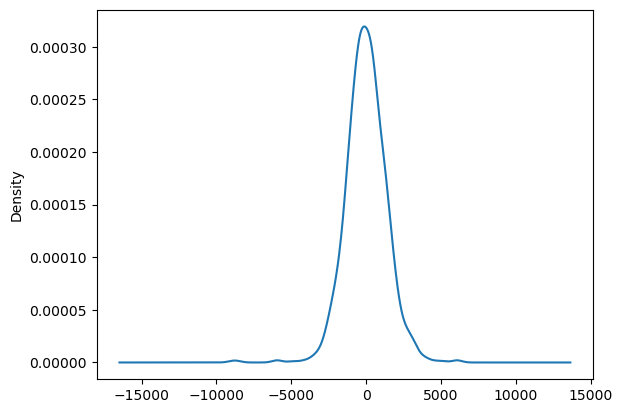

In [61]:
model2.resid.plot(kind='kde')

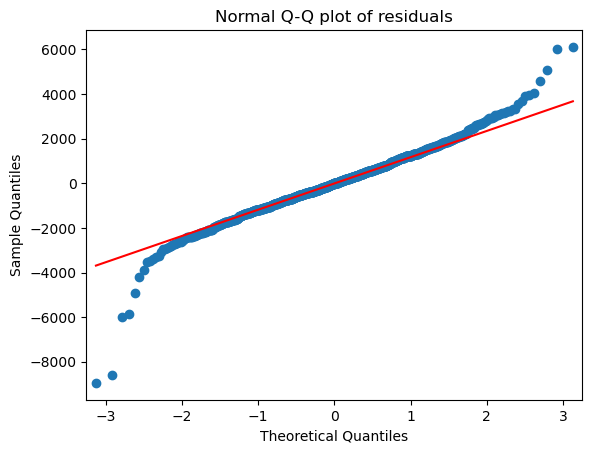

In [62]:
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

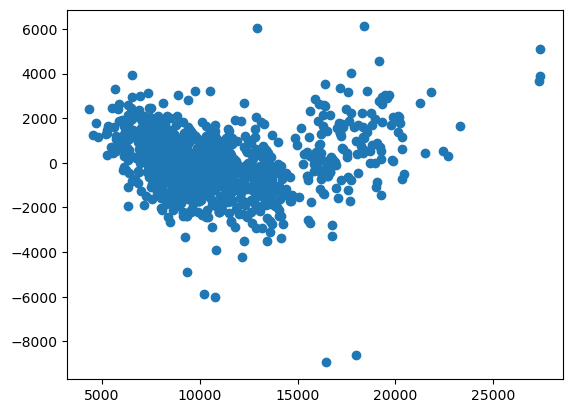

In [63]:
plt.scatter(model2.fittedvalues,model2.resid)

# Cooks Distance

In [64]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

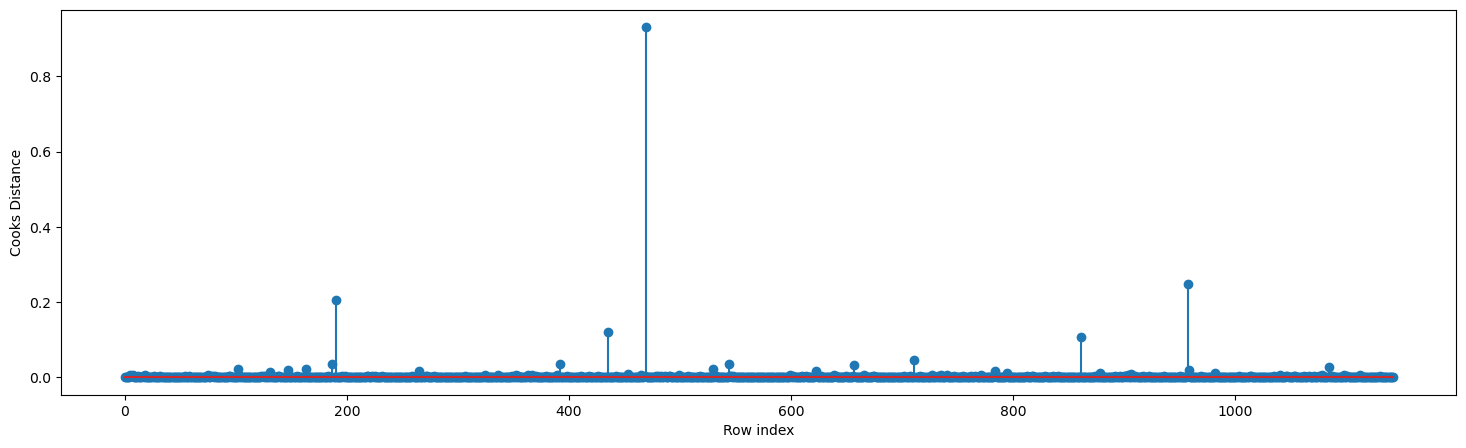

In [65]:
fig= plt.subplots(figsize=(18,5))
plt.stem(np.arange(len(train1)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [66]:
(np.argmax(c),np.max(c))

(469, 0.9308519196054647)

In [67]:
k = train1.shape[1]
n = train1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.015748031496062992

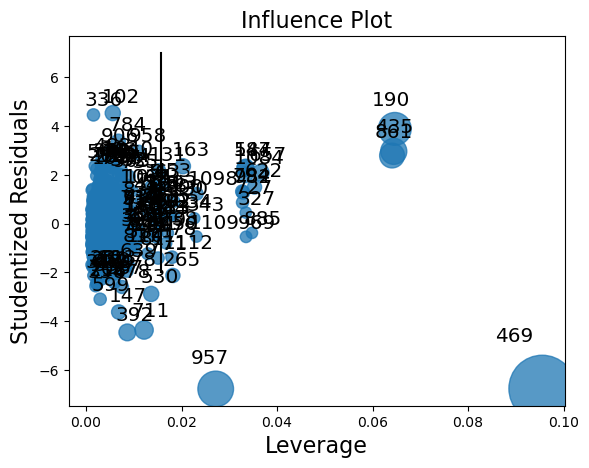

In [68]:
influence_plot(model2)
y=[i for i in range (-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,color='black')
plt.show()

In [70]:
#Drop 469,190861435 and 957 observations
train2=train1.drop(train1.index[[469, 957, 190, 435, 861]],axis=0).reset_index(drop=True)

In [71]:
train2

,Price,Age,KM,HP,Weight
0,9750,65,59000,110,1075
1,13750,54,48370,110,1080
2,6650,75,123104,110,1070
3,7500,74,58454,86,1015
4,9950,63,55942,110,1070
...,...,...,...,...,...
1133,8950,62,75000,110,1070
1134,13500,38,53000,110,1075
1135,9950,63,48738,110,1055
1136,8400,60,52487,110,1035


In [72]:
#Build the model on the new data
model3= smf.ols('Price~Age+KM+HP+Weight',data = train2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1865.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:21:31   Log-Likelihood:                -9768.7
No. Observations:                1138   AIC:                         1.955e+04
Df Residuals:                    1133   BIC:                         1.957e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7537.2793   1212.737     -6.215      0.000   -9916.741   -5157.817
Age         -117.0630      2.968    -39.438      0.000    -122.887    -111.239
KM            -0.0212      0.001    -15.757      0.000      -0.024      -0.019
HP            28.2654      2.647     10.678      0.000      23.072      33.459
Weight        21.8566      1.069     20.438      0.000      19.758      23.955
==============================================================================
Omnibus:                       44.298   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.324
Skew:                           0.070   Prob(JB):                     2.74e-27
Kurtosis:                       4.600   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
model3.resid.mean()

-2.5088259499554434e-09

<Axes: ylabel='Density'>

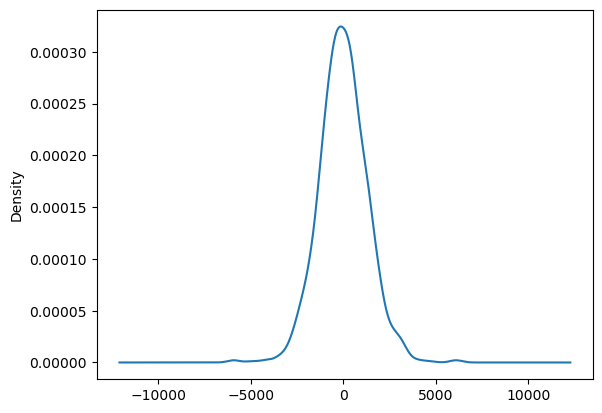

In [74]:
model3.resid.plot(kind='kde')

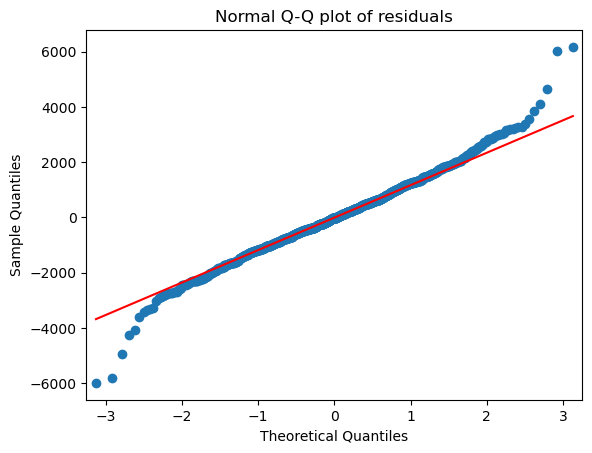

In [75]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

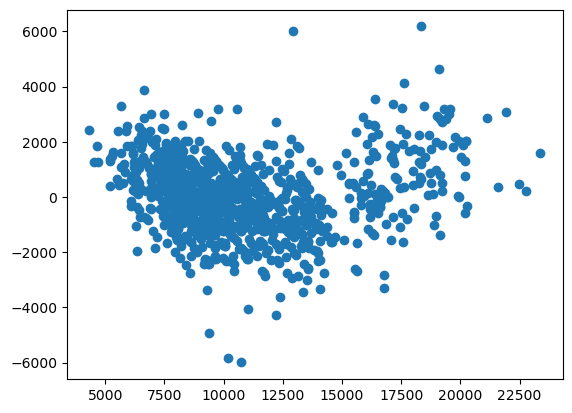

In [76]:
plt.scatter(model3.fittedvalues,model3.resid)

In [77]:
#Again check for influencers
model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

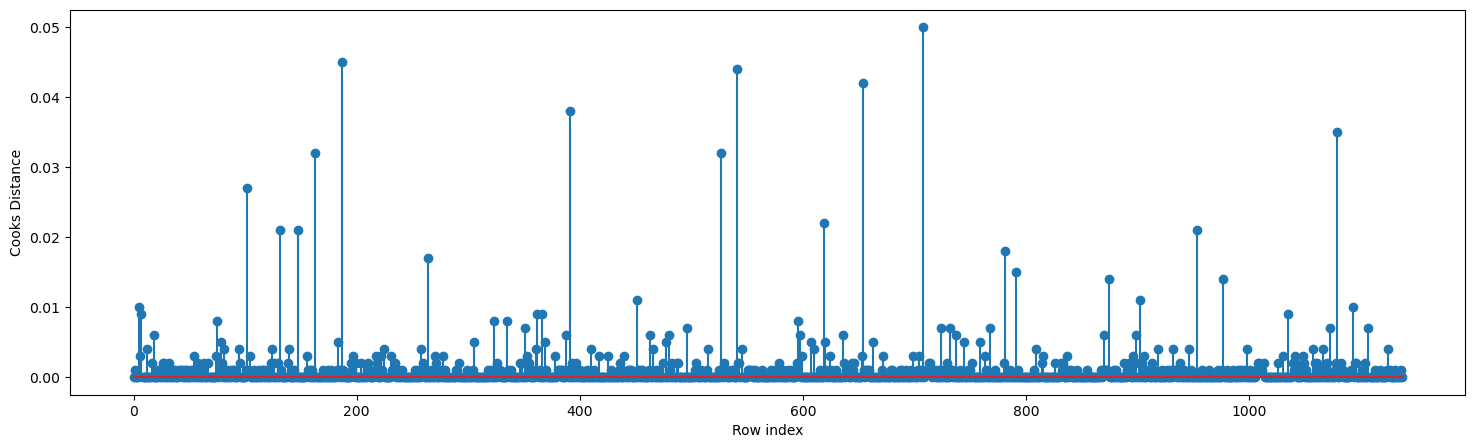

In [78]:
fig= plt.subplots(figsize=(18,5))
plt.stem(np.arange(len(train2)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

Since the value is <0.5 , we can stop the diagnostic process and finalize the model


# Cross Validation

In [79]:
import statsmodels.formula.api as smf
model3=smf.ols("Price~Age+KM+HP+Weight",data=train2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1865.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:21:55   Log-Likelihood:                -9768.7
No. Observations:                1138   AIC:                         1.955e+04
Df Residuals:                    1133   BIC:                         1.957e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7537.2793   1212.737     -6.215      0.000   -9916.741   -5157.817
Age         -117.0630      2.968    -39.438      0.000    -122.887    -111.239
KM            -0.0212      0.001    -15.757      0.000      -0.024      -0.019
HP            28.2654      2.647     10.678      0.000      23.072      33.459
Weight        21.8566      1.069     20.438      0.000      19.758      23.955
==============================================================================
Omnibus:                       44.298   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.324
Skew:                           0.070   Prob(JB):                     2.74e-27
Kurtosis:                       4.600   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
def rmse(errors):
    return np.sqrt((errors*errors).mean())

In [81]:
tr_errors=model3.resid
tr_rmse=rmse(tr_errors)
print(round(tr_rmse,2),"training RMSE")

1293.54 training RMSE


In [82]:
test

,Price,Age,KM,HP,Weight
823,10500,67,70000,107,1065
1241,8950,71,82000,110,1075
332,11950,38,32781,110,1075
602,8950,52,31000,97,1025
150,17200,20,17300,97,1110
...,...,...,...,...,...
1187,7450,75,91082,110,1050
317,10950,38,37320,97,1025
377,13500,43,10000,97,1060
126,15950,20,36000,110,1075


In [83]:
test_errors=test.Price-model3.predict(test)
test_rmse=rmse(test_errors)
print(round(test_rmse,2),"test RMSE")

1341.36 test RMSE


In [84]:
print(tr_rmse,test_rmse)

1293.541675104431 1341.3641990040173


In [85]:
final_model=smf.ols("Price~Age+KM+HP+Weight",data=train2).fit()

# Apply Lasso and Ridge

## Ridge method

In [86]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge

In [87]:
toyota1.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [88]:
X=toyota1.iloc[:,1:]
Y=toyota1.iloc[:,0]

In [89]:
X

,Age,KM,HP,Weight
0,23,46986,90,1165
1,23,72937,90,1165
2,24,41711,90,1165
3,26,48000,90,1165
4,30,38500,90,1170
...,...,...,...,...
1431,69,20544,86,1025
1432,72,19000,86,1015
1433,71,17016,86,1015
1434,70,16916,86,1015


In [90]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((1148, 4), (1148,), (288, 4), (288,))

In [91]:
# Train the model 
ridge = Ridge(alpha = 1) 
ridge.fit(x_train, y_train) 
y_pred = ridge.predict(x_test) 
y_pred_train=ridge.predict(x_train)

# calculate mean square error 

mean_squared_error_ridge_train = np.sqrt(((y_pred_train - y_train)**2).mean())
mean_squared_error_ridge_test = np.sqrt(((y_pred - y_test)**2).mean())
print('Rmse for train:',mean_squared_error_ridge_train)
print('Rmse for test:',mean_squared_error_ridge_test)

# get ridge coefficient and print them 

ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge.coef_) 
print(ridge_coefficient)

Rmse for train: 1359.4742090395744
Rmse for test: 1329.7088001345835
  Columns  Coefficient Estimate
0     Age           -120.627861
1      KM             -0.020055
2      HP             30.124392
3  Weight             21.004878


# Lasso Method

In [92]:
from sklearn.linear_model import Lasso 

In [93]:
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred = lasso.predict(x_test) 
y_pred_train=lasso.predict(x_train)

# calculate mean square error 

mean_squared_error_lasso_train = np.sqrt(((y_pred_train - y_train)**2).mean())
mean_squared_error_lasso_test = np.sqrt(((y_pred - y_test)**2).mean())
print('Rmse for train:',mean_squared_error_lasso_train)
print('Rmse for test:',mean_squared_error_lasso_test)

# get ridge coefficient and print them 

lasso_coefficient = pd.DataFrame() 
lasso_coefficient["Columns"]= x_train.columns 
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_) 
print(lasso_coefficient)

Rmse for train: 1359.4742122839202
Rmse for test: 1329.7068119023725
  Columns  Coefficient Estimate
0     Age           -120.623666
1      KM             -0.020056
2      HP             30.119788
3  Weight             21.005336


# Interview question

### 1. What is Normalization & Standardization and how is it helpful?

Normalization and standardization are two essential techniques used in data preprocessing in machine learning and data science. Both techniques are used to transform data into a common scale to make it easier to process and analyze.

### 2. What techniques can be used to address multicollinearity in multiple linear regression?

There are three techniques that can be used to address multicollinearity in multiple linear .
1. Remove Highly Correlated Predictors
2. Regularization Techniques
3. Principal Component Analysis (PCA)